<a href="https://colab.research.google.com/github/bhanukarthik1/weather_dashboard/blob/main/Weather_dashboard_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import requests #to get api call information
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
API_KEY="a7199bd24693611292be755714c9df46"
CITY=input("enter city:")
URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

enter city:MUMBAI


In [ ]:
response=requests.get(URL)
data=response.json()
# check for request status
if response.status_code==200:
  print("request is successful")
else:
  print("error no data")
print(response.status_code)

request is successful
200


In [ ]:
forecast_list=data["list"]
print(forecast_list)
# dictionary for parsed data
weather_data={
    "date_time":[],
    "temperature (°C)":[],
    "humidity (%)":[]

}
for entry in forecast_list:
  for entry in forecast_list:
    weather_data["date_time"].append(entry["dt_txt"])
    weather_data["temperature (°C)"].append(entry["main"]["temp"])
    weather_data["humidity (%)"].append(entry["main"]["humidity"])
print(weather_data)


[{'dt': 1760443200, 'main': {'temp': 31.54, 'feels_like': 34.22, 'temp_min': 28.64, 'temp_max': 31.54, 'pressure': 1007, 'sea_level': 1007, 'grnd_level': 1006, 'humidity': 53, 'temp_kf': 2.9}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'clouds': {'all': 13}, 'wind': {'speed': 5.22, 'deg': 318, 'gust': 5.51}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2025-10-14 12:00:00'}, {'dt': 1760454000, 'main': {'temp': 29.83, 'feels_like': 32.9, 'temp_min': 28.25, 'temp_max': 29.83, 'pressure': 1008, 'sea_level': 1008, 'grnd_level': 1007, 'humidity': 62, 'temp_kf': 1.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'clouds': {'all': 7}, 'wind': {'speed': 4.9, 'deg': 334, 'gust': 5.79}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2025-10-14 15:00:00'}, {'dt': 1760464800, 'main': {'temp': 28.14, 'feels_like': 30.53, 'temp_min': 28.14, 'temp_max': 28.14, 'pressure': 1008, 'se

In [ ]:
df=pd.DataFrame(weather_data)
print(df.head())
df["date_time"]=pd.to_datetime(df["date_time"])

             date_time  temperature (°C)  humidity (%)
0  2025-10-14 12:00:00             31.54            53
1  2025-10-14 15:00:00             29.83            62
2  2025-10-14 18:00:00             28.14            67
3  2025-10-14 21:00:00             27.44            65
4  2025-10-15 00:00:00             26.53            64


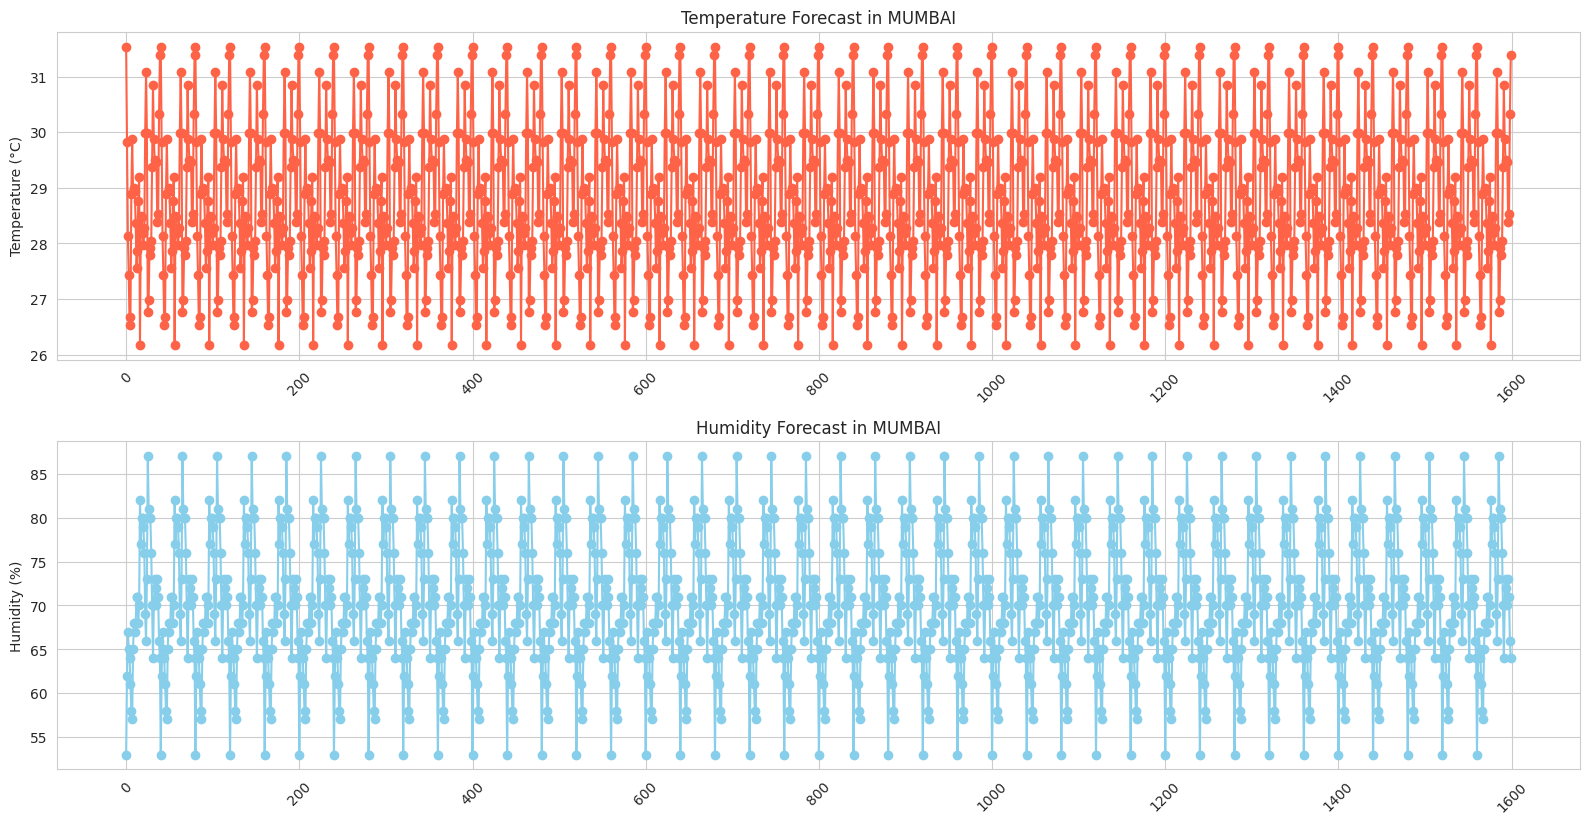

In [ ]:
plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")
# -----------------------------

# 1. Temperature
plt.subplot(3, 1, 1)
plt.plot(df.index, df["temperature (°C)"], color='tomato', marker='o')
plt.title(f"Temperature Forecast in {CITY}")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)

# 2. Humidity
plt.subplot(3, 1, 2)
plt.plot(df.index, df["humidity (%)"], color='skyblue', marker='o')
plt.title(f"Humidity Forecast in {CITY}")
plt.ylabel("Humidity (%)")
plt.xticks(rotation=45)









plt.tight_layout()
plt.show()


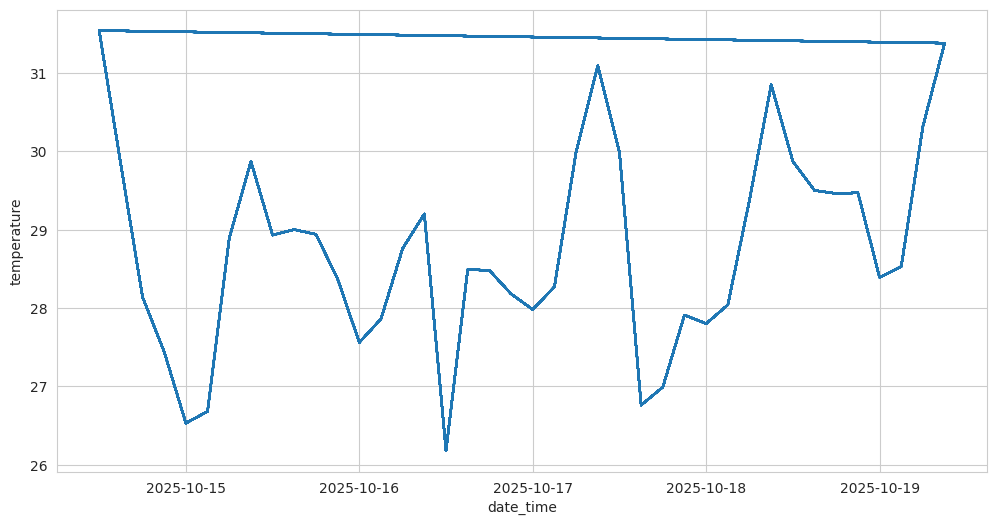

In [ ]:
plt.figure(figsize=(12,6))
plt.xlabel("date_time")
plt.ylabel("temperature")
plt.plot(df["date_time"],df["temperature (°C)"])

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400'),
  Text(1600.0, 0, '1600'),
  Text(1800.0, 0, '1800')])

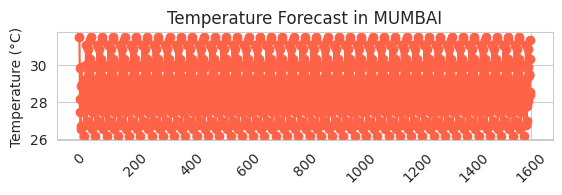

In [ ]:
plt.subplot(3, 1, 1)
plt.plot(df.index, df["temperature (°C)"], color='tomato', marker='o')
plt.title(f"Temperature Forecast in {CITY}")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400'),
  Text(1600.0, 0, '1600'),
  Text(1800.0, 0, '1800')])

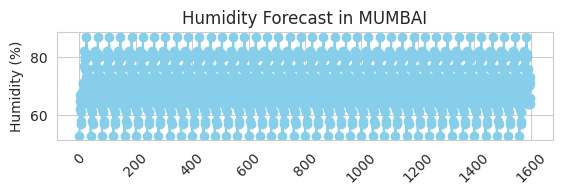

In [ ]:
plt.subplot(3, 1, 2)
plt.plot(df.index, df["humidity (%)"], color='skyblue', marker='o')
plt.title(f"Humidity Forecast in {CITY}")
plt.ylabel("Humidity (%)")
plt.xticks(rotation=45)

In [ ]:
# Convert 'date_time' column to datetime type
df["date_time"] = pd.to_datetime(df["date_time"])

# Set 'date_time' as the index (this creates a DatetimeIndex)
df.set_index("date_time", inplace=True)


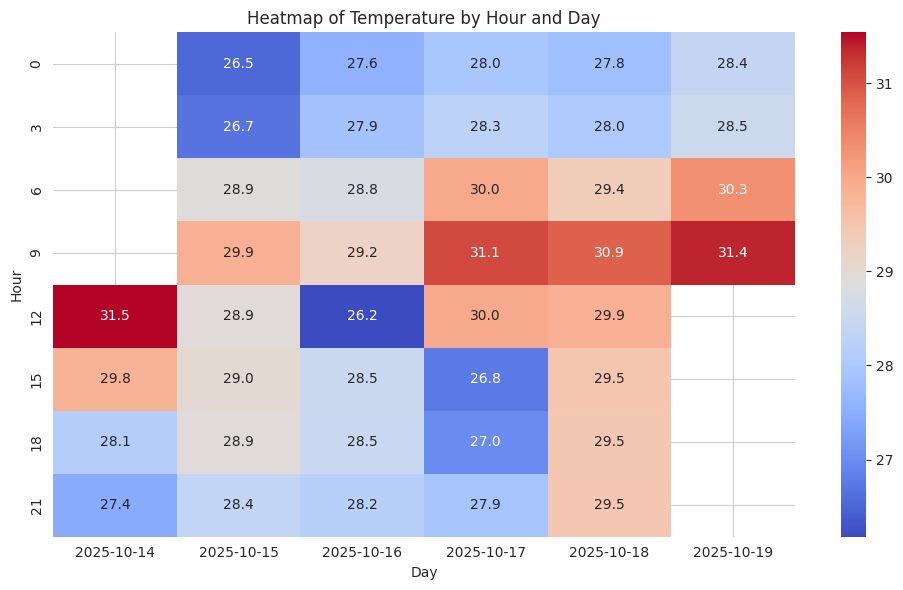

In [ ]:
# 4. Heatmap of temperature vs time of day
df['hour'] = df.index.hour
df['day'] = df.index.date
pivot_temp = df.pivot_table(index='hour', columns='day', values='temperature (°C)')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_temp, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Heatmap of Temperature by Hour and Day")
plt.xlabel("Day")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()